<a href="https://colab.research.google.com/github/qt10/HousingPrices/blob/master/HousingPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install download

In [0]:
from download import download
import matplotlib.pyplot as plt
import os.path as op
import shutil as sh
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

**Files.** Download train and test sets from URL (google drive, shareable link)
To get downloadable google drive link link: https://www.wonderplugin.com/online-tools/google-drive-direct-link-generator/
Otherwise it provides link to view/edit (html page)

In [0]:
#url = "https://drive.google.com/file/d/1KiPWzxLdhq1DDtzfps1SDoJ7VTLdIi50/view?usp=sharing"
#path = download(url, '~/HousingPricestrain.csv', replace=True)

**Pandas.** The primary data structures in pandas are implemented as two classes:

DataFrame, which you can imagine as a relational data table, with rows and named columns.
Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.

In [0]:
housing_dataframe = pd.read_csv("https://drive.google.com/uc?export=download&id=1MiYUCykhEjA8jL6rogZtbWv-BOvoZhIy", sep=",", error_bad_lines=False)
housing_dataframe.describe()
housing_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e7e2371d0>]],
      dtype=object)

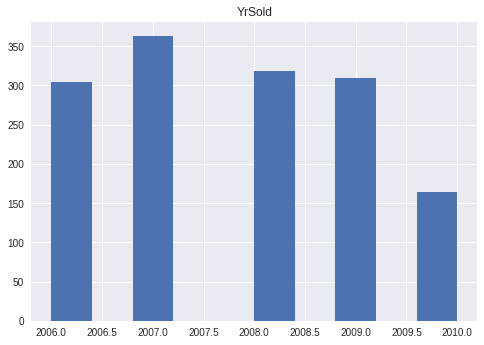

In [0]:
#show distribution of "year sold" values
housing_dataframe.hist('YrSold')

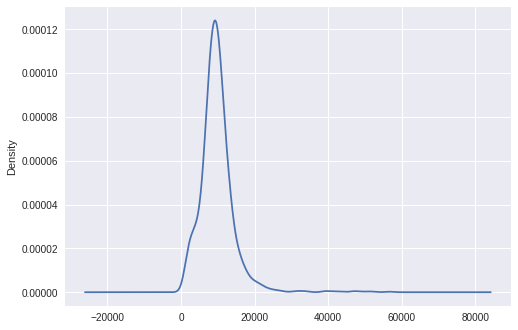

In [0]:
lot_area_series = housing_dataframe.LotArea
#show density of series
lot_area_series.plot.kde()

**Display names of all columns**

In [0]:
#list(housing_dataframe.columns.values)
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [0]:
housing_dataframe.shape

(1459, 80)

**Check for empty values**

In [0]:
housing_dataframe.columns[housing_dataframe.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

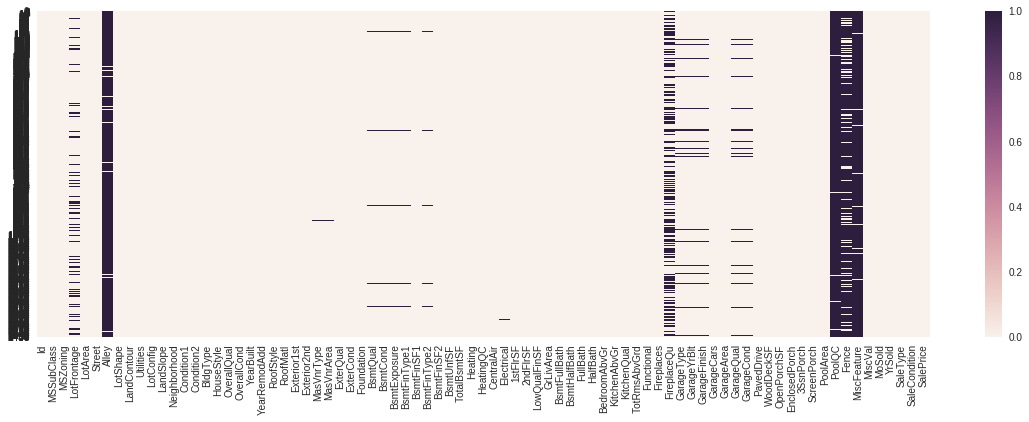

In [0]:
plt.figure(figsize=(20, 6))
sns.heatmap(housing_dataframe.isnull())
plt.show()

In [0]:
train_corr = housing_dataframe.select_dtypes(include=[np.number])

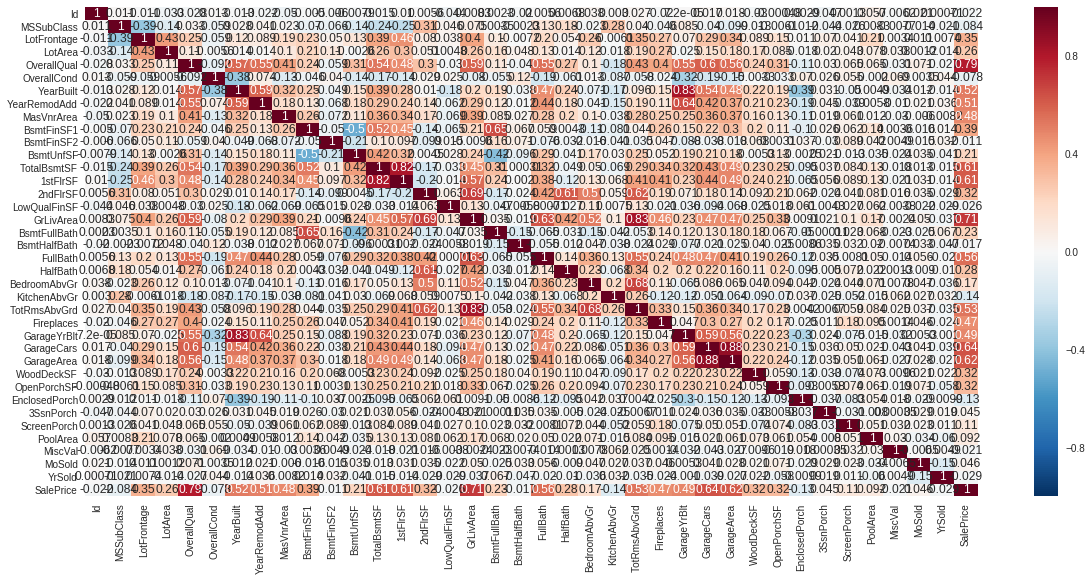

In [0]:
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

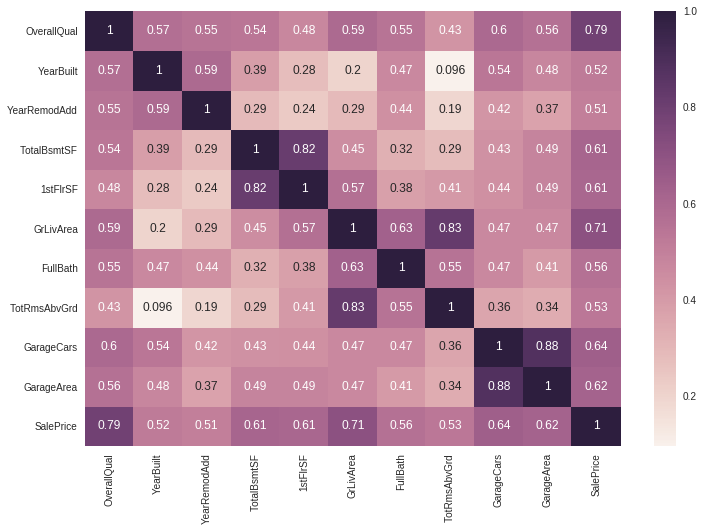

In [0]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = housing_dataframe[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

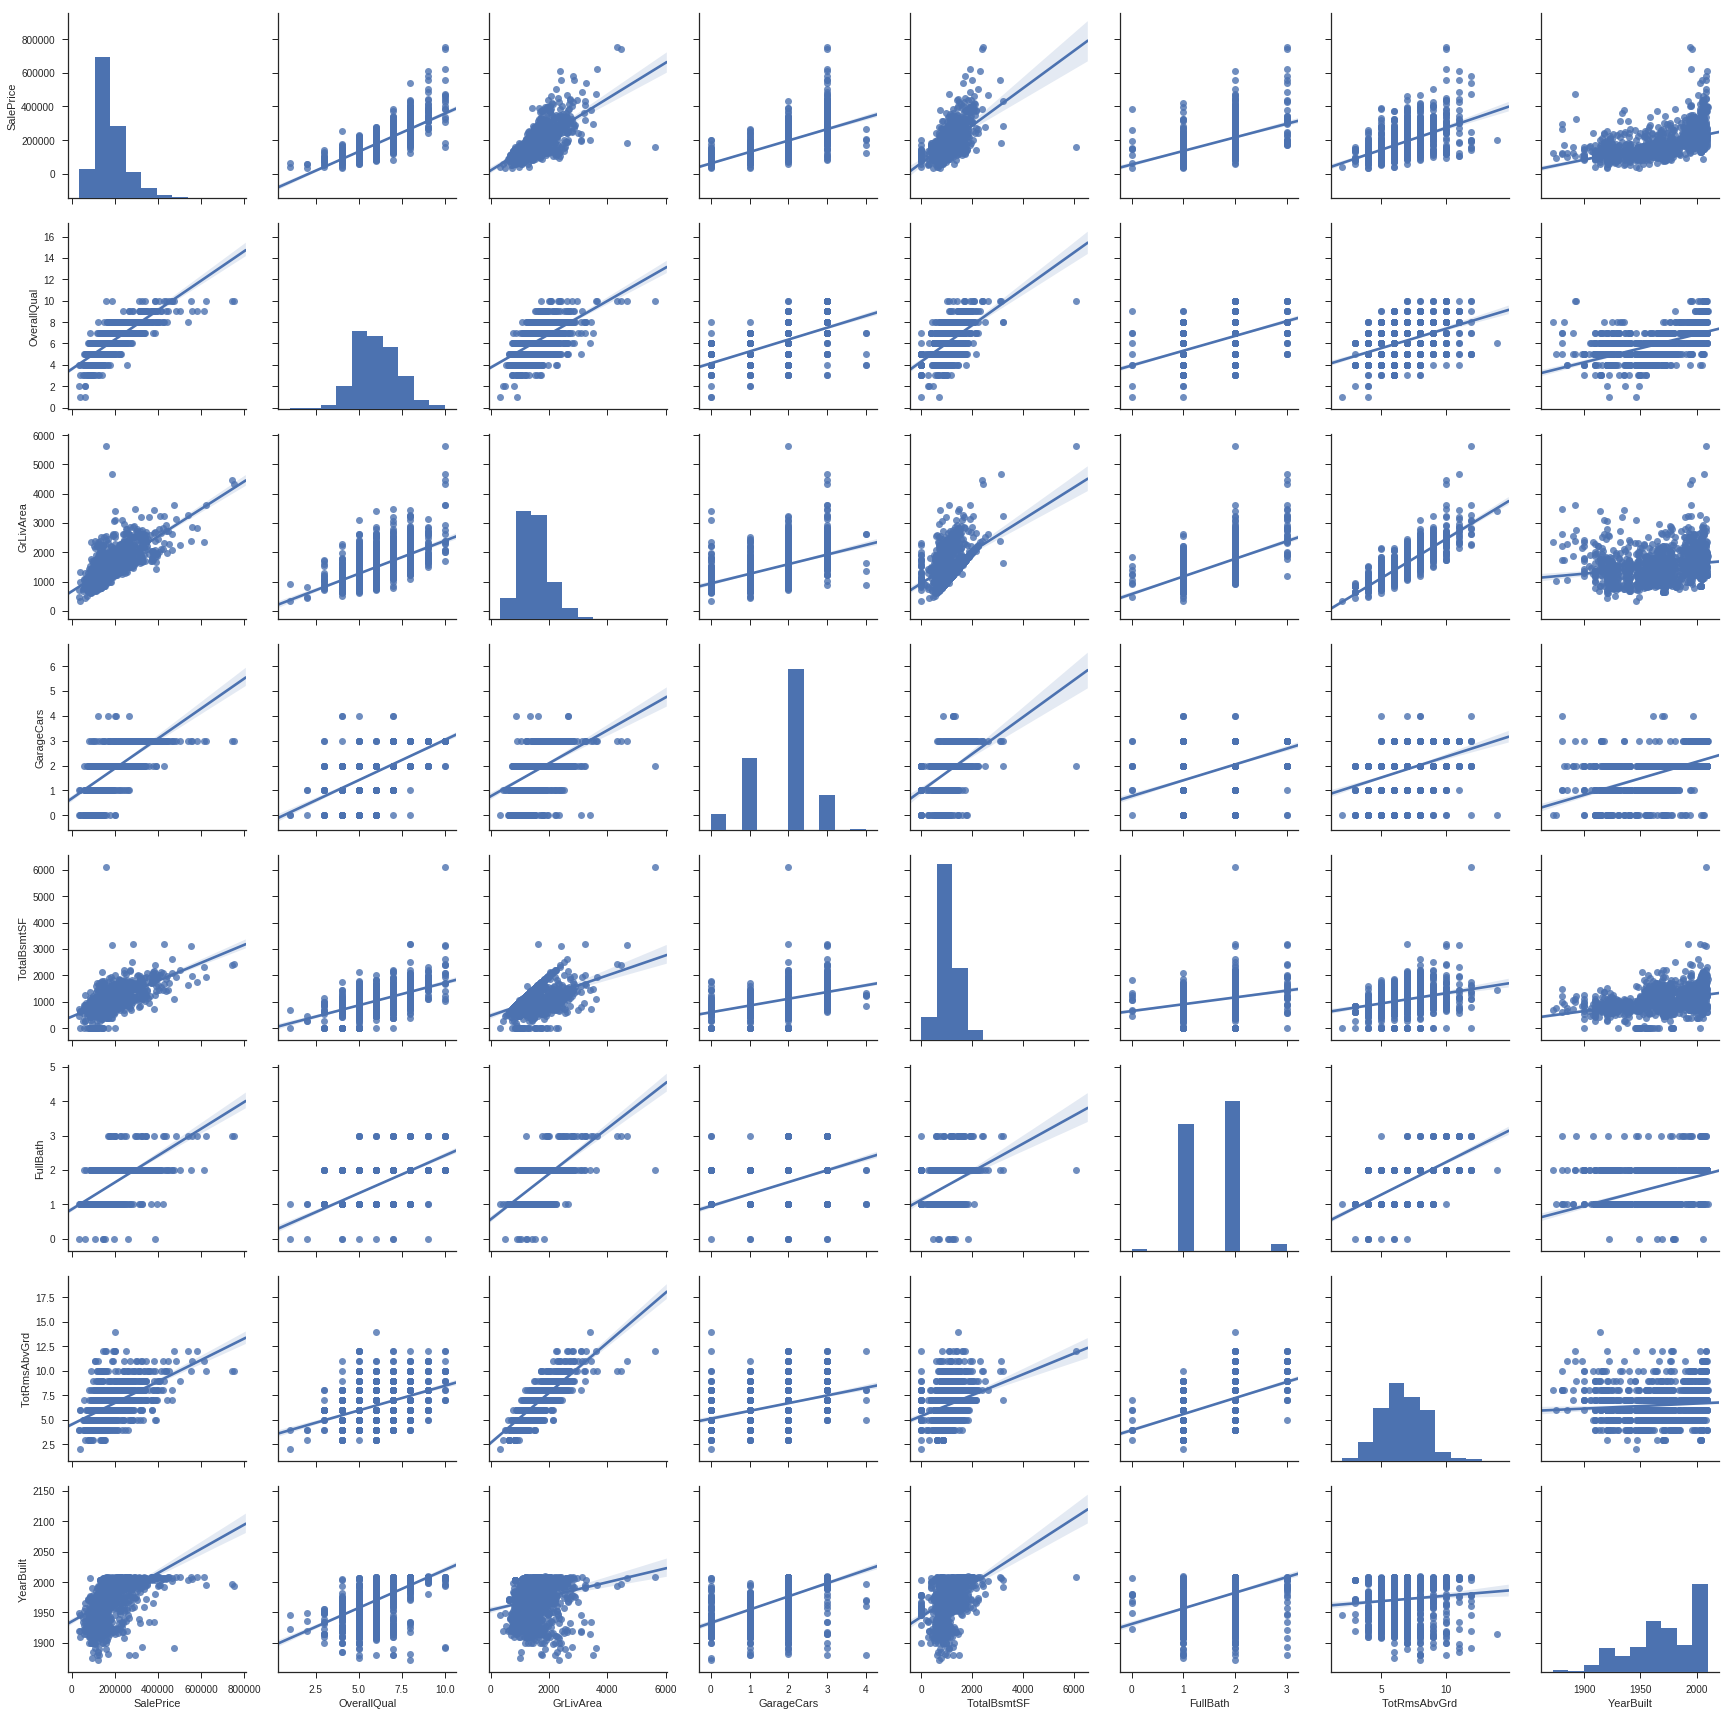

In [0]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(housing_dataframe[col], size=3, kind='reg')

In [0]:
print("Find most important features relative to target")
corr = housing_dataframe.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

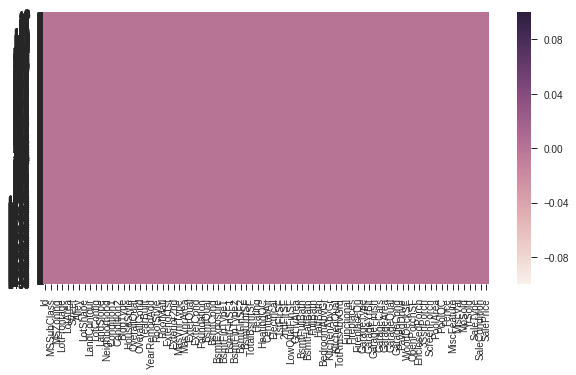

In [0]:
housing_dataframe['PoolQC'] = housing_dataframe['PoolQC'].fillna('None')
#Arround 50% missing values attributes have been fill by None
housing_dataframe['MiscFeature'] = housing_dataframe['MiscFeature'].fillna('None')
housing_dataframe['Alley'] = housing_dataframe['Alley'].fillna('None')
housing_dataframe['Fence'] = housing_dataframe['Fence'].fillna('None')
housing_dataframe['FireplaceQu'] = housing_dataframe['FireplaceQu'].fillna('None')
housing_dataframe['LotFrontage'] = housing_dataframe.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing_dataframe[col] = housing_dataframe[col].fillna('None')
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_dataframe[col] = housing_dataframe[col].fillna(int(0))
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    housing_dataframe[col] = housing_dataframe[col].fillna('None')
housing_dataframe['MasVnrArea'] = housing_dataframe['MasVnrArea'].fillna(int(0))
housing_dataframe['MasVnrType'] = housing_dataframe['MasVnrType'].fillna('None')
housing_dataframe['Electrical'] = housing_dataframe['Electrical'].fillna(housing_dataframe['Electrical']).mode()[0]
housing_dataframe = housing_dataframe.drop(['Utilities'], axis=1)
plt.figure(figsize=(10, 5))
sns.heatmap(housing_dataframe.isnull())


In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(housing_dataframe[c].values)) 
    housing_dataframe[c] = lbl.transform(list(housing_dataframe[c].values))

In [0]:
y = housing_dataframe['SalePrice']
del housing_dataframe['SalePrice']
X = housing_dataframe.values
y = y.values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [0]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [0]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.38023801546413
